# ETL de las Principales Cryptomonedas
_____________________________________________________________________________________________________________

## Introducción
Los datos utilizados en este proyecto son extraidos de la API de alphavantage, la cual es una plataforma que ofrece datos en tiempo real de la información historica de precio de las diferentes stocks. En este proyecto nos enfocaremos en algunas de las principales cryptomonedas de este 2023, las cuales son: Bitcoin, ethereum, litecoin, cardano y bitcoin-cash.

Luego almacenaremos esos datos en una base de datos en la nube. En esta ocacion se utilizó el servicio RDS de Amazon Web Service.


## Fuentes
Sitio web de Alpha vantage https://www.alphavantage.co/<br>
Amazon web service https://aws.amazon.com/<br>
Sitio web de noticias sobre cryptomonedas https://www.criptonoticias.com/mercados/por-que-bitcoin-cayo-preci-bajo-2022-aqui-razones/


## Objetivos
realizar el proceso de extracción, transformación y carga de datos (ETL).<br>
Obtener información del comportamiento de las criptomonedas

In [87]:
!pip install psycopg2

In [12]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import psycopg2 as ps
import cred #modulo en donde almaceno las credenciales 

In [6]:
API_KEY = cred.API_KEY

def get_data(symbol, market, api_key):
    """Funcion encargada en obtener los datos solicitados de la API y los devuelve en formato JSON"""
    
    url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol='+symbol+'&market='+market+'&apikey='+API_KEY
    r = requests.get(url)
    data = r.json()

    return data

In [55]:
def crear_dataframe(data):
    """Funcion que recibe los datos en formato Json y devuelve un dataframe"""
    data_new = data['Time Series (Digital Currency Daily)']
    df = pd.DataFrame(data_new)
    return df.transpose()

def limpiar_columnas(data):
    """Funcion encargada de eliminar las columnas innecesarias"""
    return data[['1a. open (USD)', #'1b. open (USD)', 
             '2a. high (USD)', #'2b. high (USD)',
               '3a. low (USD)', #'3b. low (USD)', 
             '4a. close (USD)', #'4b. close (USD)',
       '5. volume', '6. market cap (USD)']]

def convertir_column(df):
    """Funcion encargada de cambiar el valor de las columnas de dataframe a tipo numerico"""
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [56]:
data_BTC = get_data('BTC', 'USD', API_KEY) #Datos de bitcoin
data_ETH = get_data('ETH', 'USD', API_KEY) #Datos de ethereum
data_LTC = get_data('LTC', 'USD', API_KEY) #Datos de litecoin
data_ADA = get_data('ADA', 'USD', API_KEY) #Datos de Cardano
data_BCH = get_data('BCH', 'USD', API_KEY) #Datos de BitcoinCash

In [57]:
#Se llama a las funciones que crean los dataframes
df_ETH = crear_dataframe(data_ETH)
df_BTC = crear_dataframe(data_BTC)
data_LTC = crear_dataframe(data_LTC)
data_ADA = crear_dataframe(data_ADA)
data_BCH = crear_dataframe(data_BCH)

#Se llaman a las funciones que eliminan columnas innecesarias
df_BTC_fix  = limpiar_columnas(df_BTC)
df_ETH_fix = limpiar_columnas(df_ETH)
data_LTC_fix = limpiar_columnas(data_LTC)
data_ADA_fix = limpiar_columnas(data_ADA)
data_BCH_fix = limpiar_columnas(data_BCH)

In [7]:
df_BTC_fix.isna().sum()

1a. open (USD)         0
2a. high (USD)         0
3a. low (USD)          0
4a. close (USD)        0
5. volume              0
6. market cap (USD)    0
dtype: int64

In [8]:
df_ETH_fix.isna().sum()

1a. open (USD)         0
2a. high (USD)         0
3a. low (USD)          0
4a. close (USD)        0
5. volume              0
6. market cap (USD)    0
dtype: int64

In [9]:
data_LTC_fix.isna().sum()

1a. open (USD)         0
2a. high (USD)         0
3a. low (USD)          0
4a. close (USD)        0
5. volume              0
6. market cap (USD)    0
dtype: int64

In [10]:
data_ADA_fix.isna().sum()

1a. open (USD)         0
2a. high (USD)         0
3a. low (USD)          0
4a. close (USD)        0
5. volume              0
6. market cap (USD)    0
dtype: int64

In [11]:
data_BCH_fix.isna().sum()

1a. open (USD)         0
2a. high (USD)         0
3a. low (USD)          0
4a. close (USD)        0
5. volume              0
6. market cap (USD)    0
dtype: int64

In [58]:
df_BTC_fix = convertir_column(df_BTC_fix)
df_ETH_fix = convertir_column(df_ETH_fix)
data_LTC_fix = convertir_column(data_LTC_fix)
data_ADA_fix = convertir_column(data_ADA_fix)
data_BCH_fix = convertir_column(data_BCH_fix)

<ipython-input-55-7c843824cb40>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


In [13]:
data_BCH_fix.dtypes

1a. open (USD)         float64
2a. high (USD)         float64
3a. low (USD)          float64
4a. close (USD)        float64
5. volume              float64
6. market cap (USD)    float64
dtype: object

In [14]:
df_BTC_fix.dtypes

1a. open (USD)         float64
2a. high (USD)         float64
3a. low (USD)          float64
4a. close (USD)        float64
5. volume              float64
6. market cap (USD)    float64
dtype: object

## Evolucion de las cryptomonedas en los ultimos 365 días

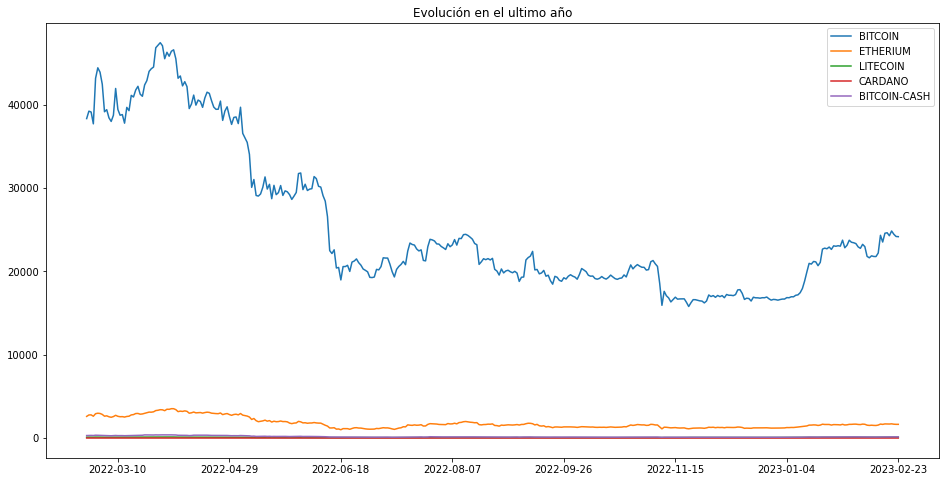

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
df_BTC_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
df_ETH_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_LTC_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_ADA_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_BCH_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
ax.invert_xaxis()
ax.legend(['BITCOIN', 'ETHERIUM', 'LITECOIN', 'CARDANO', 'BITCOIN-CASH'])
plt.title('Evolución en el ultimo año')
plt.show()

## observaciones
Podemos observar que la grafica de bitcoin al tener un precio mucho mayor a las demás dificulta la visibilidad a las otras monedas. Aunque se alcanza a visualizar bien ethereum, y segun muestra la gráfica, bitcoin es mucho mas irregular en comparación con ethereum, cuyo precio se observa que es más constante. Aunque probablemente pueda parecer mas irregular debido al hecho de que al ser valores mas grandes no se note tanto la irregularidad de ethereum

## Vamos a observar otra gráfica, pero sin bitcoin

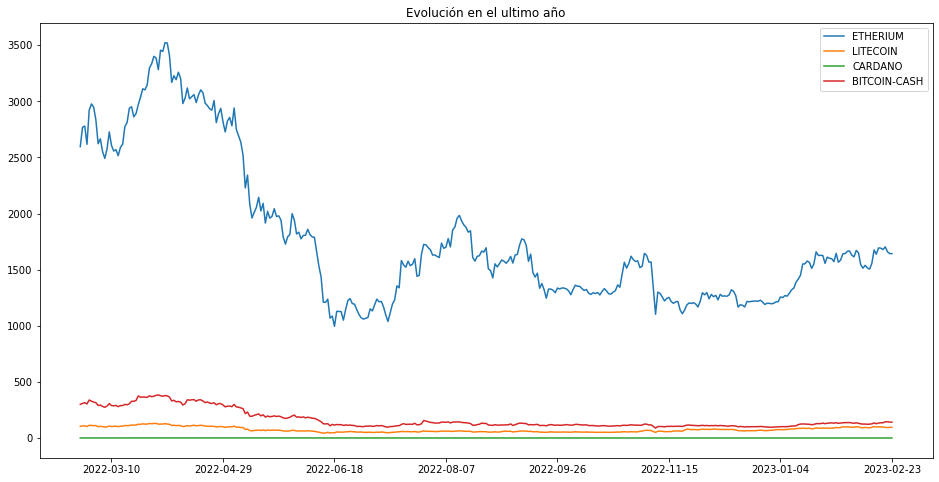

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

df_ETH_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_LTC_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_ADA_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_BCH_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
ax.invert_xaxis()
ax.legend(['ETHERIUM', 'LITECOIN', 'CARDANO', 'BITCOIN-CASH'])
plt.title('Evolución en el ultimo año')
plt.show()

## Observaciones
Efectivamente, ethereum tambien ha sido irregular, aunque no a niveles economicos como los de bitcoin. Es interesante tambien como ambas monedas tienen grandes caídas entre los meses de marzo(03), hasta el mes de Junio(06). y en el mes de noviembre(11) tambien sufre un bajon drástico. Ambas gráficas tienen un comportamiente bastante parecido. Veamos como se comportan las otras monedas.

## Observemos otra grafica, pero ahora sin bitcoin ni ethereum

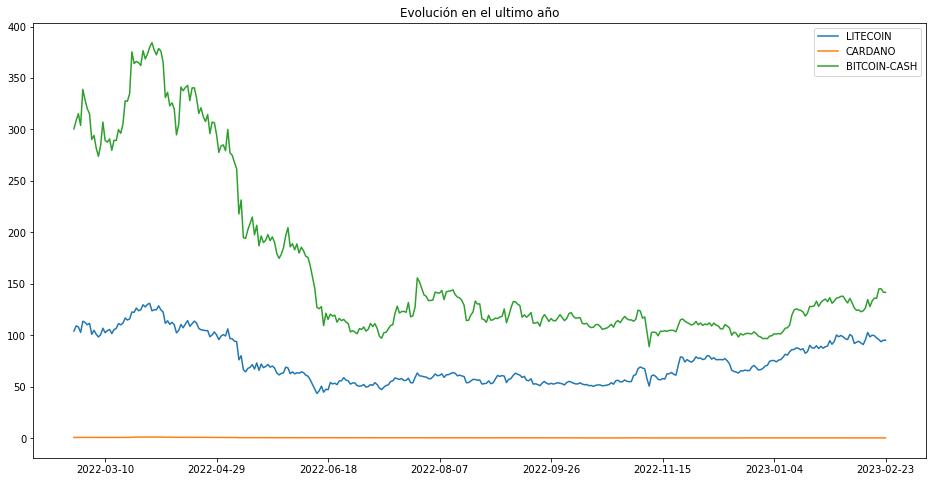

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

data_LTC_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_ADA_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
data_BCH_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
ax.invert_xaxis()
ax.legend(['LITECOIN', 'CARDANO', 'BITCOIN-CASH'])
plt.title('Evolución en el ultimo año')
plt.show()

## Observaciones
Se puede observar que litecoin y bitcoin bash tienen un comportamiento bastante parecido a las graficas de bitcoin y ethereum. Claro, a menor escala de precio, pero el patron de las graficas es el mismo. Ahora observemos la grafica de Cardano

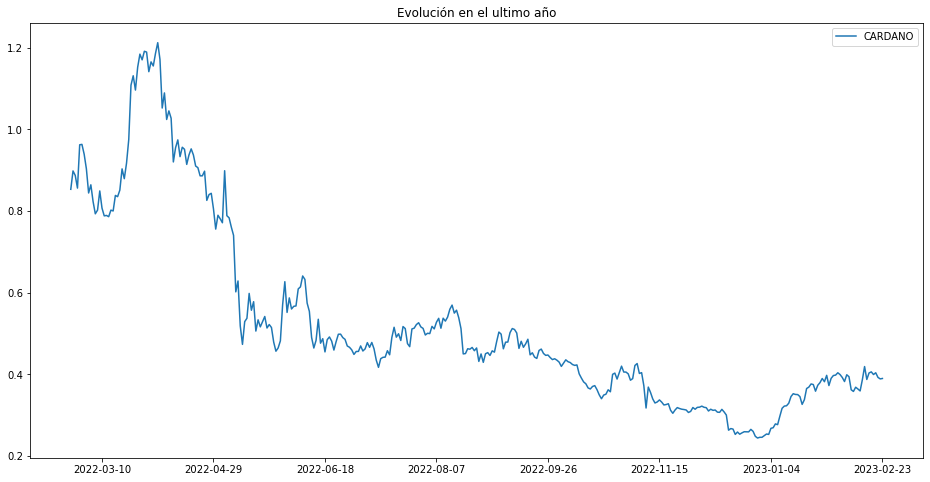

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

data_ADA_fix.head(365).plot( y = '4a. close (USD)', ax = ax)
ax.invert_xaxis()
ax.legend(['CARDANO'])
plt.title('Evolución en el ultimo año')
plt.show()

## Observaciones

Se puede observar que esta moneda tambien tiene un comportamiento al de todas las demás. 
El hecho de que todas estas monedas hayan tenido  un bajon tan importante entre los meses de marzo a junio, probablemente haya sido el anuncio que realizó el gobierno de Estados Unidos sobre el aumento de inflacion interanual de un 8,6%, el máximo en 41 años. Esto sumado al asunto de la guerra entre Rusia y Ukrania, genera miedo en las personas las cuales realizan ventas masivas, ocacionando que la moneda decaiga.

Aunque tambien se puede observar que ha habido un aumento en todas estas monedas a partir del inicio del 2023

In [19]:
df_BTC_fix.head()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,6. market cap (USD)
2023-02-23,24182.21,24246.06,24124.33,24160.27,14432.21108,14432.21108
2023-02-22,24450.67,24476.05,23574.69,24182.21,379425.75365,379425.75365
2023-02-21,24843.89,25250.00,24148.34,24452.16,376000.82868,376000.82868
2023-02-20,24272.51,25121.23,23840.83,24842.20,346938.56997,346938.56997
2023-02-19,24632.05,25192.00,24192.57,24271.76,300395.99542,300395.99542


In [59]:
df_BTC_fix = df_BTC_fix.reset_index()
df_ETH_fix = df_ETH_fix.reset_index()
data_LTC_fix = data_LTC_fix.reset_index()
data_ADA_fix = data_ADA_fix.reset_index()
data_BCH_fix = data_BCH_fix.reset_index()

In [60]:
df_ETH_fix = df_ETH_fix.rename({'index':'DATE','1a. open (USD)':'OPEN', '2a. high (USD)':'HIGH', '3a. low (USD)':'LOW', '4a. close (USD)':'CLOSE',
       '5. volume':'VOLUME', '6. market cap (USD)':'MARKET CAP'}, axis=1)
df_BTC_fix = df_BTC_fix.rename({'index':'DATE', '1a. open (USD)':'OPEN', '2a. high (USD)':'HIGH', '3a. low (USD)':'LOW', '4a. close (USD)':'CLOSE',
       '5. volume':'VOLUME', '6. market cap (USD)':'MARKET CAP'}, axis=1)
data_LTC_fix = data_LTC_fix.rename({'index':'DATE','1a. open (USD)':'OPEN', '2a. high (USD)':'HIGH', '3a. low (USD)':'LOW', '4a. close (USD)':'CLOSE',
       '5. volume':'VOLUME', '6. market cap (USD)':'MARKET CAP'}, axis=1)
data_ADA_fix = data_ADA_fix.rename({'index':'DATE','1a. open (USD)':'OPEN', '2a. high (USD)':'HIGH', '3a. low (USD)':'LOW', '4a. close (USD)':'CLOSE',
       '5. volume':'VOLUME', '6. market cap (USD)':'MARKET CAP'}, axis=1)
data_BCH_fix = data_BCH_fix.rename({'index':'DATE','1a. open (USD)':'OPEN', '2a. high (USD)':'HIGH', '3a. low (USD)':'LOW', '4a. close (USD)':'CLOSE',
       '5. volume':'VOLUME', '6. market cap (USD)':'MARKET CAP'}, axis=1)


In [61]:
df_ETH_fix['MONEDA'] = 'ETH'
df_BTC_fix['MONEDA'] = 'BTC'
data_BCH_fix['MONEDA'] = 'BCH'
data_ADA_fix['MONEDA'] = 'ADA'
data_LTC_fix['MONEDA'] = 'LTC'

In [23]:
data_LTC_fix.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,95.26,95.75,95.04,95.24,24676.136,24676.136,LTC
1,2023-02-22,93.81,95.56,91.57,95.28,693131.993,693131.993,LTC
2,2023-02-21,95.90,96.81,91.42,93.80,739676.014,739676.014,LTC
3,2023-02-20,97.43,98.72,94.39,95.90,935281.523,935281.523,LTC
4,2023-02-19,99.71,101.50,96.72,97.43,433963.156,433963.156,LTC


In [24]:
df_ETH_fix.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,1643.15,1647.09,1637.19,1642.76,20817.7558,20817.7558,ETH
1,2023-02-22,1659.77,1666.95,1595.07,1643.14,528875.4809,528875.4809,ETH
2,2023-02-21,1703.27,1716.66,1636.30,1659.76,520354.4688,520354.4688,ETH
3,2023-02-20,1679.74,1719.89,1650.56,1703.27,451314.8335,451314.8335,ETH
4,2023-02-19,1691.62,1726.59,1666.14,1679.75,401023.0477,401023.0477,ETH


In [25]:
df_BTC_fix.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,24182.21,24246.06,24124.33,24160.27,14432.21108,14432.21108,BTC
1,2023-02-22,24450.67,24476.05,23574.69,24182.21,379425.75365,379425.75365,BTC
2,2023-02-21,24843.89,25250.00,24148.34,24452.16,376000.82868,376000.82868,BTC
3,2023-02-20,24272.51,25121.23,23840.83,24842.20,346938.56997,346938.56997,BTC
4,2023-02-19,24632.05,25192.00,24192.57,24271.76,300395.99542,300395.99542,BTC


In [26]:
data_ADA_fix.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,0.3889,0.3900,0.3879,0.3898,5396799.8,5396799.8,ADA
1,2023-02-22,0.3926,0.3929,0.3769,0.3888,123152287.0,123152287.0,ADA
2,2023-02-21,0.4037,0.4059,0.3855,0.3925,119823429.0,119823429.0,ADA
3,2023-02-20,0.3994,0.4098,0.3893,0.4038,116906377.7,116906377.7,ADA
4,2023-02-19,0.4060,0.4122,0.3968,0.3995,98181230.1,98181230.1,ADA


In [27]:
data_BCH_fix.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,141.9,142.2,140.9,141.7,3235.688,3235.688,BCH
1,2023-02-22,145.3,145.7,136.8,142.0,49878.017,49878.017,BCH
2,2023-02-21,145.0,154.4,142.7,145.3,144377.878,144377.878,BCH
3,2023-02-20,136.1,149.1,133.2,145.1,123482.868,123482.868,BCH
4,2023-02-19,136.2,141.1,134.6,136.0,58952.375,58952.375,BCH


## Conectarme a BD de aws

In [62]:
#conectar a bd
def conect_db(host_name, dbname, port, username, password):
    try:
        conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)
    except ps.OperationalError as e:
        raise e
    else:
        print('Conectado')
    return conn


### Funciones para crear las tablas

In [63]:
#Funciones encargadas de crear las tablas    
def create_table_btc(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS BITCOIN_TABLE(
                            DATE_DAY VARCHAR(50) PRIMARY KEY,
                            OPEN DECIMAL(10,2) NOT NULL,
                            HIGH DECIMAL(10,2) NOT NULL,
                            LOW DECIMAL(10,2) NOT NULL,
                            CLOSE DECIMAL(10,2) NOT NULL,
                            VOLUME DECIMAL(10,2) NOT NULL,
                            MARKET_CAP DECIMAL(10,2) NOT NULL,
                            MONEDA VARCHAR(50) NOT NULL
    )""")
    curr.execute(create_table_command)
    
def create_table_eth(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS ETHEREUM_TABLE(
                            DATE_DAY VARCHAR(50) PRIMARY KEY,
                            OPEN DECIMAL(10,2) NOT NULL,
                            HIGH DECIMAL(10,2) NOT NULL,
                            LOW DECIMAL(10,2) NOT NULL,
                            CLOSE DECIMAL(10,2) NOT NULL,
                            VOLUME DECIMAL(10,2) NOT NULL,
                            MARKET_CAP DECIMAL(10,2) NOT NULL,
                            MONEDA VARCHAR(50) NOT NULL
    )""")
    curr.execute(create_table_command)
    
def create_table_bch(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS BITCOIN_CASH_TABLE(
                            DATE_DAY VARCHAR(50) PRIMARY KEY,
                            OPEN DECIMAL(10,2) NOT NULL,
                            HIGH DECIMAL(10,2) NOT NULL,
                            LOW DECIMAL(10,2) NOT NULL,
                            CLOSE DECIMAL(10,2) NOT NULL,
                            VOLUME DECIMAL(10,2) NOT NULL,
                            MARKET_CAP DECIMAL(10,2) NOT NULL,
                            MONEDA VARCHAR(50) NOT NULL
    )""")
    curr.execute(create_table_command)



### Funcion que actualiza y verifica si los datos a ingresar ya existen en la tabla

In [80]:
#Bitcoin
def update_table_btc(curr, df):
    tmp_df = pd.DataFrame(columns=['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME',
                                   'MARKET CAP', 'MONEDA'])
    
    for i, row in df.iterrows():
        if check_if_btc_exist(curr, row['DATE']):
            a = 1
        else:
            tmp_df = tmp_df.append(row)
    return tmp_df

def check_if_btc_exist(curr, date):
    
    query = ("""SELECT DATE_DAY FROM BITCOIN_TABLE WHERE DATE_DAY = %s""")
    curr.execute(query, (date,))
    
    return curr.fetchone() is not None

#ethereum
def update_table_eth(curr, df):
    tmp_df = pd.DataFrame(columns=['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME',
                                   'MARKET CAP', 'MONEDA'])
    
    for i, row in df.iterrows():
        if check_if_eth_exist(curr, row['DATE']):
            a = 1
        else:
            tmp_df = tmp_df.append(row)
    return tmp_df

def check_if_eth_exist(curr, date):
    
    query = ("""SELECT DATE_DAY FROM ETHEREUM_TABLE WHERE DATE_DAY = %s""")
    curr.execute(query, (date,))
    
    return curr.fetchone() is not None
    
#BITCOIN CASH
def update_table_bch(curr, df):
    tmp_df = pd.DataFrame(columns=['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME',
                                   'MARKET CAP', 'MONEDA'])
    
    for i, row in df.iterrows():
        if check_if_bch_exist(curr, row['DATE']):
            a = 1
        else:
            tmp_df = tmp_df.append(row)
    return tmp_df

def check_if_bch_exist(curr, date):
    
    query = ("""SELECT DATE_DAY FROM BITCOIN_CASH_TABLE WHERE DATE_DAY = %s""")
    curr.execute(query, (date,))
    
    return curr.fetchone() is not None

### Funcion que inserta los df a las tablas de las DB

In [89]:
#Bitcoin
def append_data_btc(curr, df):
    for i, row in df.iterrows():
        insert_data_btc(curr, row['DATE'], row['OPEN'], row['HIGH'], row['LOW'], row['CLOSE'], row['VOLUME'], row['MARKET CAP'], row['MONEDA'])
        

def insert_data_btc(curr, DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA):

    insert_into_db= ("""INSERT INTO BITCOIN_TABLE(DATE_DAY, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
                    VALUES(%s, %s, %s, %s, %s, %s, %s, %s);
                    """)
    row_to_insert= (DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
    curr.execute(insert_into_db, row_to_insert)
    
    #ethereum
def append_data_eth(curr, df):
    for i, row in df.iterrows():
        insert_data_eth(curr, row['DATE'], row['OPEN'], row['HIGH'], row['LOW'], row['CLOSE'], row['VOLUME'], row['MARKET CAP'], row['MONEDA'])
        

def insert_data_eth(curr, DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA):

    insert_into_db= ("""INSERT INTO ETHEREUM_TABLE(DATE_DAY, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
                    VALUES(%s, %s, %s, %s, %s, %s, %s, %s);
                    """)
    row_to_insert= (DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
    curr.execute(insert_into_db, row_to_insert)
    
#Bitcoin_cash
def append_data_bch(curr, df):
    for i, row in df.iterrows():
        insert_data_bch(curr, row['DATE'], row['OPEN'], row['HIGH'], row['LOW'], row['CLOSE'], row['VOLUME'], row['MARKET CAP'], row['MONEDA'])
        

def insert_data_bch(curr, DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA):

    insert_into_db= ("""INSERT INTO BITCOIN_CASH_TABLE(DATE_DAY, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
                    VALUES(%s, %s, %s, %s, %s, %s, %s, %s);
                    """)
    row_to_insert= (DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, MARKET_CAP, MONEDA)
    curr.execute(insert_into_db, row_to_insert)

In [9]:
host_name = cred.host_name
dbname = cred.dbname
port = '5432'
username = 'luischifundo'
password = cred.password
conn= None


In [ ]:
conn = conect_db(host_name, dbname, port, username, password) #conexion a la base de datos

In [68]:
#Permite que python ejecute comandos de sql
curr = conn.cursor()

### creación de tablas

In [69]:
create_table_btc(curr) #NEW TABLE BTC create
create_table_eth(curr) #NEW TABLE eth create
create_table_bch(curr) #NEW TABLE BCh create

### verificar si los datos ya se encuentran en la tabla

In [77]:
new_row_btc = update_table_btc(curr, df_BTC_fix.head(300)) #df de bitcoin actualizado

In [88]:
new_row_btc.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,24182.21,24246.06,24124.33,24160.27,14432.21108,14432.21108,BTC
1,2023-02-22,24450.67,24476.05,23574.69,24182.21,379425.75365,379425.75365,BTC
2,2023-02-21,24843.89,25250.00,24148.34,24452.16,376000.82868,376000.82868,BTC
3,2023-02-20,24272.51,25121.23,23840.83,24842.20,346938.56997,346938.56997,BTC
4,2023-02-19,24632.05,25192.00,24192.57,24271.76,300395.99542,300395.99542,BTC


In [81]:
new_row_eth = update_table_eth(curr, df_ETH_fix.head(300)) #df de bitcoin actualizado

In [87]:
new_row_eth.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,1643.15,1647.09,1637.19,1642.76,20817.7558,20817.7558,ETH
1,2023-02-22,1659.77,1666.95,1595.07,1643.14,528875.4809,528875.4809,ETH
2,2023-02-21,1703.27,1716.66,1636.30,1659.76,520354.4688,520354.4688,ETH
3,2023-02-20,1679.74,1719.89,1650.56,1703.27,451314.8335,451314.8335,ETH
4,2023-02-19,1691.62,1726.59,1666.14,1679.75,401023.0477,401023.0477,ETH


In [82]:
new_row_bch = update_table_bch(curr, data_BCH_fix.head(300)) #df de bitcoin actualizado

In [85]:
new_row_bch.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET CAP,MONEDA
0,2023-02-23,141.9,142.2,140.9,141.7,3235.688,3235.688,BCH
1,2023-02-22,145.3,145.7,136.8,142.0,49878.017,49878.017,BCH
2,2023-02-21,145.0,154.4,142.7,145.3,144377.878,144377.878,BCH
3,2023-02-20,136.1,149.1,133.2,145.1,123482.868,123482.868,BCH
4,2023-02-19,136.2,141.1,134.6,136.0,58952.375,58952.375,BCH


### Inserción de los datos en la base de datos

In [ ]:
append_data_btc(curr, new_row_btc) #tabla bitcoin cargada

In [90]:
append_data_eth(curr, new_row_eth) #tabla ethereum cargada

In [91]:
append_data_bch(curr, new_row_bch) #tabla bitcoin_cash cargada

In [93]:
conn.commit()

## Conclusión

El mercado de las cryptomonedas es algo complicado de entender, ya que depende de muchos factores, y mas el de una moneda como bitcoin, pero podemos concluir con que el comportamiento de las otras criptomonedas es parecido al de una cadena, ya que si bitcoin sube o baja las demás probablemente tendrán la misma tendencia.

Por otra parte, fue interesante realizar el proceso de ETL, ya que es algo muy importante cuando se trabaja con datos. Más aún cuando se trabaja con servicios en la nube, es una herramienta poderosa que nos facilita muchas cosas.